<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/image_segmentation/image_sgmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리.
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
import pixellib
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(4000, 6000, 3)
(4032, 3024, 3)
(6000, 4000, 3)


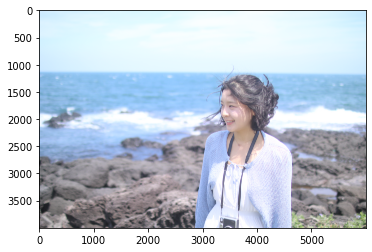

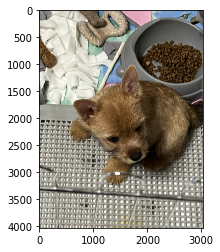

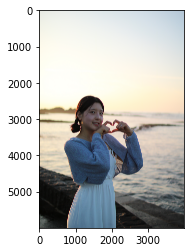

In [ ]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_1966.JPG'
img_orig1 = cv2.imread(img_path1)
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/KakaoTalk_20230918_145414862_01.jpg'
img_orig2 = cv2.imread(img_path2)
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/KakaoTalk_20230905_200332507_01.jpg'
img_orig3 = cv2.imread(img_path3)
print(img_orig1.shape)
print(img_orig2.shape)
print(img_orig3.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f71ff2af670>)

In [ ]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [ ]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path1) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [ ]:
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
output2 = cv2.transpose(output2)
output2 = cv2.flip(output2, 1)

In [ ]:
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)
output3 = cv2.transpose(output3)
output3 = cv2.flip(output3, 0)

(4000, 6000)
(4032, 3024)
(6000, 4000)


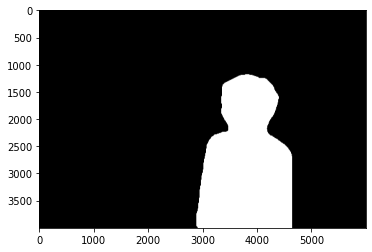

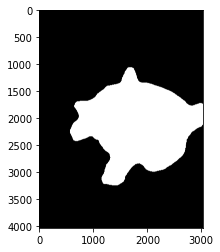

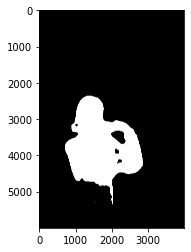

In [ ]:
seg_color1 = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color2 = (0,0,64)
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map1 = np.all(output1==seg_color1, axis=-1)
seg_map2 = np.all(output2==seg_color2, axis=-1)
seg_map3 = np.all(output3==seg_color1, axis=-1)
print(seg_map1.shape)
print(seg_map2.shape)
print(seg_map3.shape)
plt.imshow(seg_map1, cmap='gray')
plt.show()
plt.imshow(seg_map2, cmap='gray')
plt.show()
plt.imshow(seg_map3, cmap='gray')
plt.show()

# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show1 = img_orig1.copy()
img_show2 = img_orig2.copy()
img_show3 = img_orig3.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask1 = seg_map1.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255

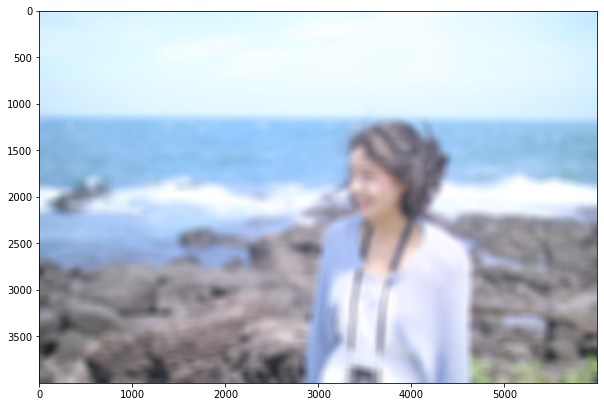

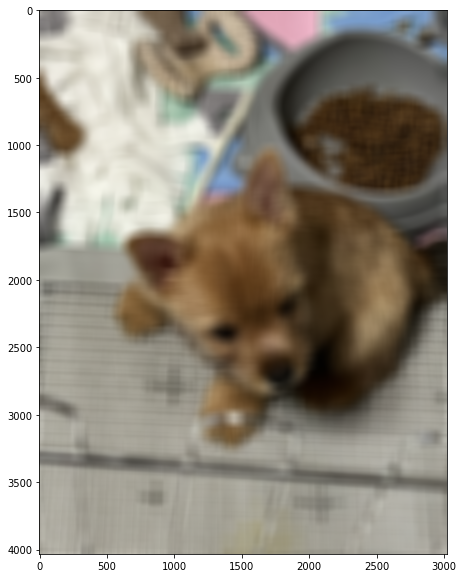

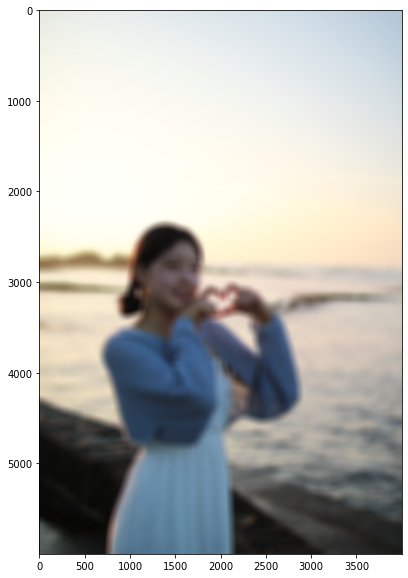

In [ ]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur1 = cv2.blur(img_orig1, (100,100))
img_orig_blur2 = cv2.blur(img_orig2, (100,100))
img_orig_blur3 = cv2.blur(img_orig3, (100,100))
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_orig_blur1, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()

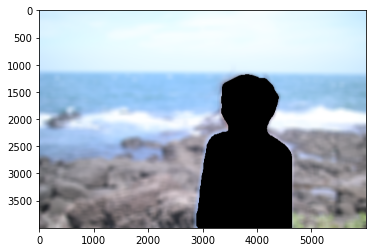

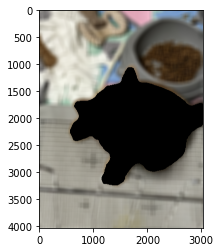

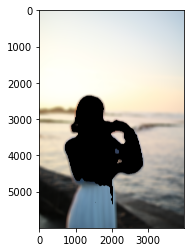

In [ ]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)
plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))
plt.show()
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()

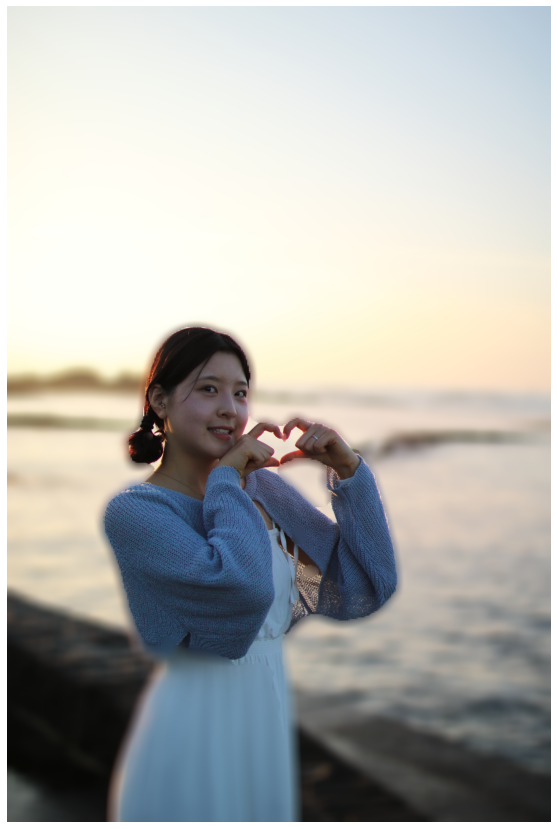

In [ ]:
plt.figure(figsize=(15,15))  # (10,10)은 원하는 크기에 따라 조정하십시오.
img_concat3 = np.where(img_mask_color3 == 255, img_orig3, img_bg_blur3)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

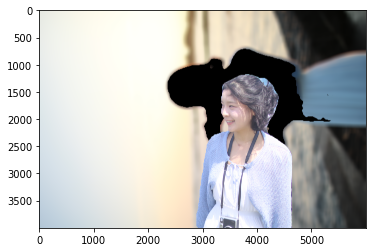

In [ ]:
img_bg_blur4 = cv2.transpose(img_bg_blur3)

# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat1 = np.where(img_mask_color1 == 255, img_orig1, img_bg_blur4)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

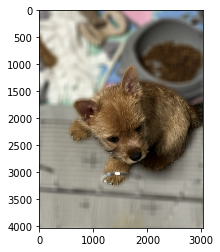

In [ ]:
img_concat2 = np.where(img_mask_color2 == 255, img_orig2, img_bg_blur2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

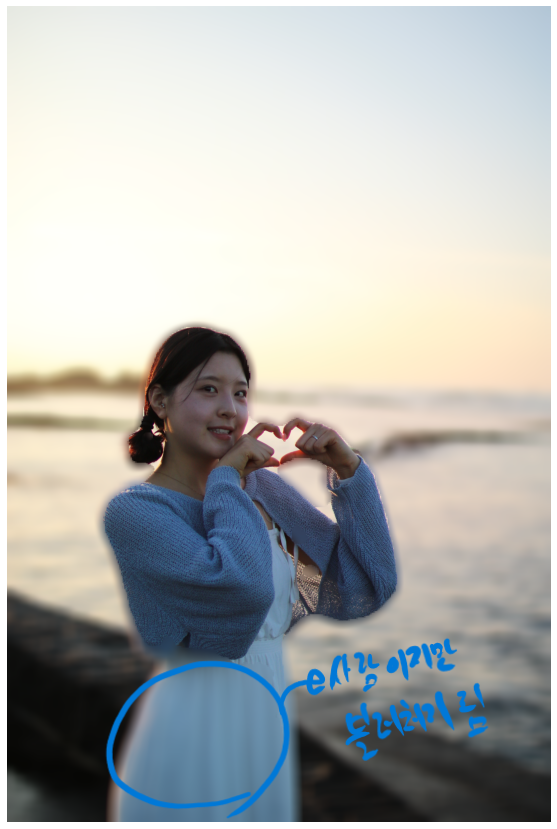

In [ ]:
!pip install -q mediapipe==0.10.0

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# 사용자가 지정한 파일 목록
IMAGE_FILES = [img_path1, img_path3]
BG_COLOR = (0, 0, 0)  # black
MASK_COLOR = (255, 255, 255)  # white

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


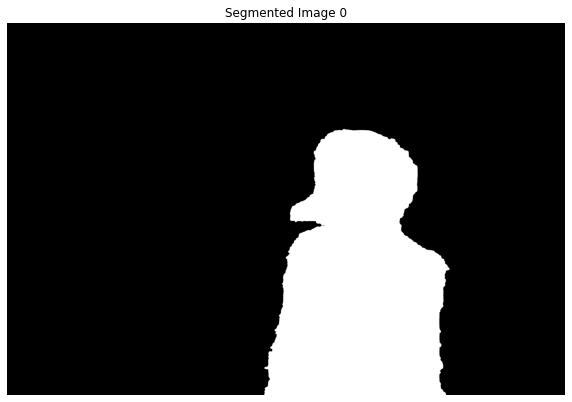

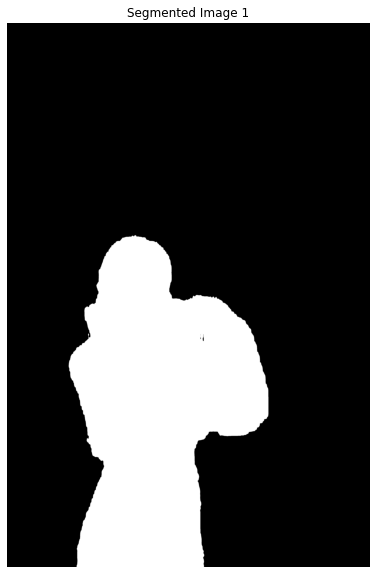

In [ ]:
with mp_selfie_segmentation.SelfieSegmentation(model_selection=0) as selfie_segmentation:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        if image is None:
            print(f"Unable to load image: {file}")
            continue

        # Convert the BGR image to RGB before processing.
        results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw selfie segmentation on the background image.
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        fg_image = np.zeros(image.shape, dtype=np.uint8)
        fg_image[:] = MASK_COLOR
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        output_image = np.where(condition, fg_image, bg_image)


        # Show the output image using matplotlib
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image {idx}")
        plt.axis('off')  # Hide the axis values
        plt.show()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


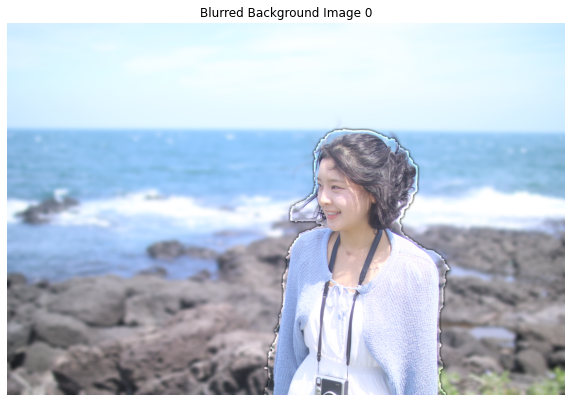

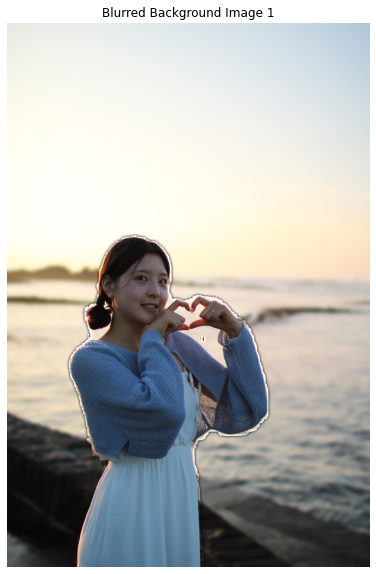

In [ ]:
with mp_selfie_segmentation.SelfieSegmentation(model_selection=0) as selfie_segmentation:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        if image is None:
            print(f"Unable to load image: {file}")
            continue

        # Convert the BGR image to RGB before processing.
        results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Create a binary mask for the foreground
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1

        # Extract the background using the inverse of the condition
        background = np.where(condition, 0, image).astype(np.uint8)

        # Blur the background
        blurred_background = cv2.blur(background, (50, 50), 0)

        # Create a mask of the original foreground
        foreground_mask = np.where(condition, image, 0).astype(np.uint8)

        # Combine the blurred background with the original foreground
        combined = cv2.addWeighted(blurred_background, 1, foreground_mask, 1, 0)

        # Show the combined image using matplotlib
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
        plt.title(f"Blurred Background Image {idx}")
        plt.axis('off')  # Hide the axis values
        plt.show()

In [ ]:
with mp_selfie_segmentation.SelfieSegmentation(model_selection=0) as selfie_segmentation:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        if image is None:
            print(f"Unable to load image: {file}")
            continue

        # Convert the BGR image to RGB before processing.
        results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Create a binary mask for the foreground
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1

        # Create a soft mask by blurring the binary mask and converting it to float
        soft_mask = cv2.GaussianBlur(condition.astype(np.uint8)*255, (25, 25), 0)
        soft_mask = soft_mask / 255.0  # Normalize back to range [0, 1]

        # Extract the background using the inverse of the soft mask
        background = image * (1.0 - soft_mask)

        # Blur the background
        blurred_background = cv2.GaussianBlur(background, (25, 25), 0)

        # Create a mask of the original foreground using the soft mask
        foreground_mask = image * soft_mask

        # Combine the blurred background with the original foreground
        combined = (blurred_background + foreground_mask).astype(np.uint8)

        # Show the combined image using matplotlib
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
        plt.title(f"Blurred Background Image {idx}")
        plt.axis('off')  # Hide the axis values
        plt.show()
